<font size=5 >NBA Players Salary Prediction</font>

<font size=4 >Python Application Using AdaBoost Algorithm</font>

Author：[Xiao Song](https://xsong.ltd/en) a.k.a. Malcolm   
​
> [Another Version](https://xsong.ltd/en/nba/) is available on my personal website.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#Descriptive-Statistics-&amp;--Data-Visualization" data-toc-modified-id="Descriptive-Statistics-&amp;--Data-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descriptive Statistics &amp;  Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Average-Points-Per-Game-Ranking" data-toc-modified-id="Average-Points-Per-Game-Ranking-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Average Points Per Game Ranking</a></span></li><li><span><a href="#Player-Efficiency-Rating-Ranking" data-toc-modified-id="Player-Efficiency-Rating-Ranking-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Player Efficiency Rating Ranking</a></span></li><li><span><a href="#High-Age-Players-Ranking" data-toc-modified-id="High-Age-Players-Ranking-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>High Age Players Ranking</a></span></li><li><span><a href="#Turnover-Ranking" data-toc-modified-id="Turnover-Ranking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Turnover Ranking</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Correlation Plot</a></span></li><li><span><a href="#Correlation-between-Points-per-game-and-age" data-toc-modified-id="Correlation-between-Points-per-game-and-age-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Correlation between Points per game and age</a></span></li><li><span><a href="#Which-position-is-the-most-prone-to-turnovers?" data-toc-modified-id="Which-position-is-the-most-prone-to-turnovers?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Which position is the most prone to turnovers?</a></span></li><li><span><a href="#Who-has-the-most-blocks?" data-toc-modified-id="Who-has-the-most-blocks?-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Who has the most blocks?</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Dependent-Variable" data-toc-modified-id="Dependent-Variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dependent Variable</a></span></li></ul></li><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithms</a></span><ul class="toc-item"><li><span><a href="#CART" data-toc-modified-id="CART-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CART</a></span></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>AdaBoost</a></span></li></ul></li></ul></div>

# Data Wrangling

+ [Data from Kaggle](https://www.kaggle.com/koki25ando/nba-salary-prediction-using-multiple-regression/comments)

In [1]:
import os
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

![](https://images.complex.com/complex/image/upload/c_fill,dpr_auto,f_auto,fl_lossy,g_face,q_auto,w_1280/jordan-rodman-pippen_fmecu8.jpg)

In [2]:
salary_table = pd.read_csv("../input/salary/NBA_season1718_salary.csv",encoding = 'utf-8') 
seasons = pd.read_csv("../input/nba-players-stats/Seasons_Stats.csv",encoding = 'utf-8')  

+ Variable Explaining


Variable | meaning
------------- | -------------
Pos | Position
MPG | Average Minutes played Per Game
PPG | Average Points Per Game
APG | Average Assists Per Game
RPG | Average Rebounds Per Game
TOPG | Average Turnovers Per Game
BPG | Average Blocks Per Game
SPG | Average Steals Per Game
PER | Player Efficiency Rating
G | Games Attended
AGE | Age
salary17_18 | 2017-2018 Salary(million)

In [3]:
salary_table = salary_table[['Player','season17_18']]
salary_table.rename(columns={'season17_18':'salary17_18'},inplace = True) #variable rename
salary_table['salary17_18'] = salary_table['salary17_18']/1000000 #transform salary to 'million'

seasons = seasons[seasons['Year']>=2017] 
stats17 = seasons[['Year','Player','Pos','Age','G','PER',
                   'MP','PTS','AST','TRB','TOV','BLK','STL']]

stats17.drop_duplicates(subset=['Player'], keep='first',inplace=True) #drop duplicate data

c = ['MPG','PPG','APG','RPG','TOPG','BPG','SPG']
w = ['MP','PTS','AST','TRB','TOV','BLK','STL'] 

for i,s in zip(c,w):
    stats17[i] = stats17[s] / stats17['G']

stats17.drop(w,axis=1,inplace=True)
#stats17.drop(['G'],axis=1,inplace=True)
stats17.loc[stats17['Pos'] == 'PF-C','Pos'] = 'PF'
stats_salary = pd.merge(stats17, salary_table) 


In [4]:
stats_salary.columns

Index(['Year', 'Player', 'Pos', 'Age', 'G', 'PER', 'MPG', 'PPG', 'APG', 'RPG',
       'TOPG', 'BPG', 'SPG', 'salary17_18'],
      dtype='object')

# Descriptive Statistics &  Data Visualization

## Average Points Per Game Ranking

In [5]:
stats_salary.drop_duplicates(subset=['Player'],keep='first',inplace=True)
stats_salary.sort_values(by='PPG',ascending=False,inplace = True)
stats_salary[['Player','PPG']].head(10)

,Player,PPG
418,Russell Westbrook,31.580247
164,James Harden,29.086420
384,Isaiah Thomas,28.934211
97,Anthony Davis,27.986667
105,DeMar DeRozan,27.297297
248,Damian Lillard,26.986667
86,DeMarcus Cousins,26.972222
204,LeBron James,26.405405
241,Kawhi Leonard,25.513514
95,Stephen Curry,25.303797


## Player Efficiency Rating Ranking

In [6]:
stats_salary.sort_values(by='PER',ascending = False,inplace = True)
stats_salary[['Player','PER']].head(10)

,Player,PER
200,Demetrius Jackson,30.8
418,Russell Westbrook,30.6
261,Boban Marjanovic,29.6
114,Kevin Durant,27.6
97,Anthony Davis,27.5
241,Kawhi Leonard,27.5
164,James Harden,27.3
204,LeBron James,27.0
384,Isaiah Thomas,26.5
218,Nikola Jokic,26.4


## High Age Players Ranking

In [7]:
stats_salary.sort_values(by='Age',ascending = False,inplace = True)
stats_salary[['Player','Age']].head(10)

,Player,Age
70,Vince Carter,40.0
147,Manu Ginobili,39.0
383,Jason Terry,39.0
325,Paul Pierce,39.0
303,Dirk Nowitzki,38.0
172,Udonis Haslem,36.0
112,Mike Dunleavy,36.0
89,Jamal Crawford,36.0
206,Richard Jefferson,36.0
26,Matt Barnes,36.0


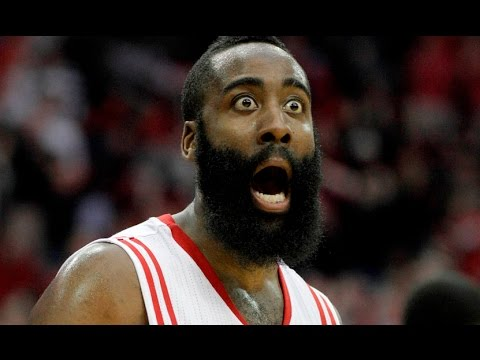

## Turnover Ranking
+ In the turnover list per game, James Harden ranked first, this should be related to the ball, and will be verified later.

In [8]:
stats_salary.sort_values(by='TOPG',ascending=False,inplace = True)
stats_salary[['Player','TOPG']].head(10)

,Player,TOPG
164,James Harden,5.728395
418,Russell Westbrook,5.407407
410,John Wall,4.141026
204,LeBron James,4.094595
121,Joel Embiid,3.774194
86,DeMarcus Cousins,3.736111
44,Eric Bledsoe,3.378788
359,Dennis Schroder,3.265823
49,Devin Booker,3.089744
95,Stephen Curry,3.025316


## Correlation Plot

In [9]:
sns.set_style("white")

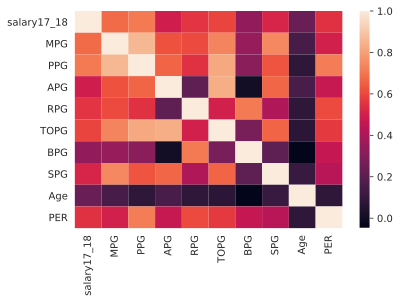

In [10]:
heat_salary= stats_salary[['salary17_18','Pos','MPG','PPG','APG','RPG','TOPG',
                           'BPG','SPG','Age','PER']]
dfData = heat_salary.corr() 
sns.heatmap(dfData)

+ Age and multiple data indicators are weakly correlated.
+ Average turnovers per game and playing time have strong correlation, and it might explain why James Harden has some many turnovers averagely.
+ Because of position, there is almost no correlation between averaging blocks and assists per game.

## Correlation between Points per game and age

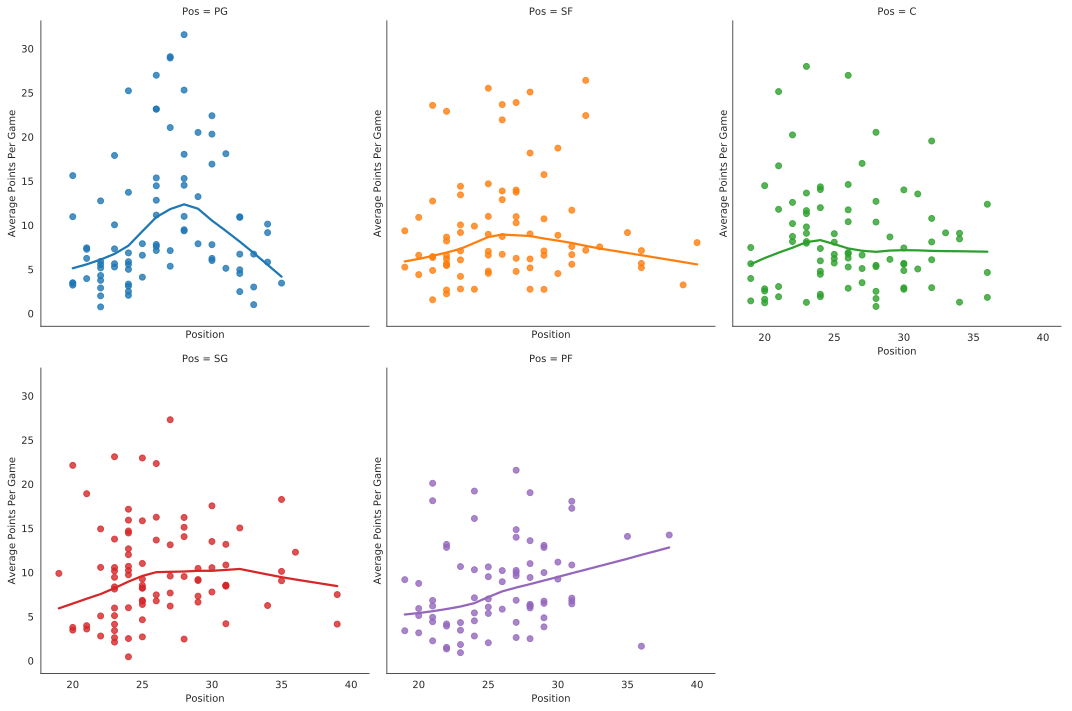

In [11]:
sns.lmplot(x="Age", y="PPG",hue="Pos",col="Pos",col_wrap=3, 
           data=stats_salary,lowess=True).set(
    xlabel='Position', 
    ylabel='Average Points Per Game')

For point guards, age and average scores are inverse U-shaped.

## Which position is the most prone to turnovers?

[Text(0, 0.5, 'Average Turnovers Per Game'), Text(0.5, 0, 'Position')]

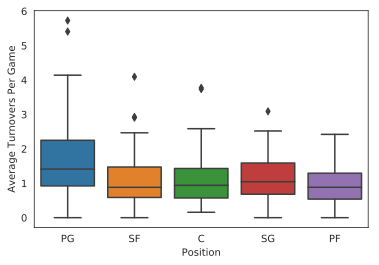

In [12]:
sns.boxplot(x="Pos", y="TOPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

Answer：Point Guards

## Who has the most blocks? 
no doubt

[Text(0, 0.5, 'Average Blocks Per Game'), Text(0.5, 0, 'Position')]

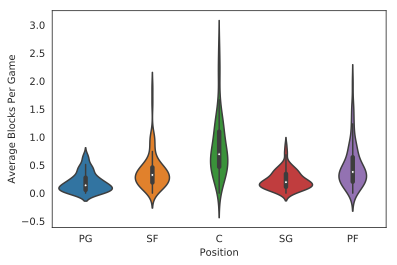

In [13]:
sns.violinplot(x="Pos", y="BPG", data=stats_salary).set(
    xlabel='Position', 
    ylabel='Average Blocks Per Game')

#  Preprocessing

In [14]:
 from sklearn.preprocessing import Normalizer

In [15]:
#from mpl_toolkits.mplot3d import Axes3D
#sns.pairplot(heat_salary)

Most variables are skew, thus we should rescale them.

In [16]:
%config InlineBackend.figure_format = 'png'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf69460be0>,
      dtype=object)

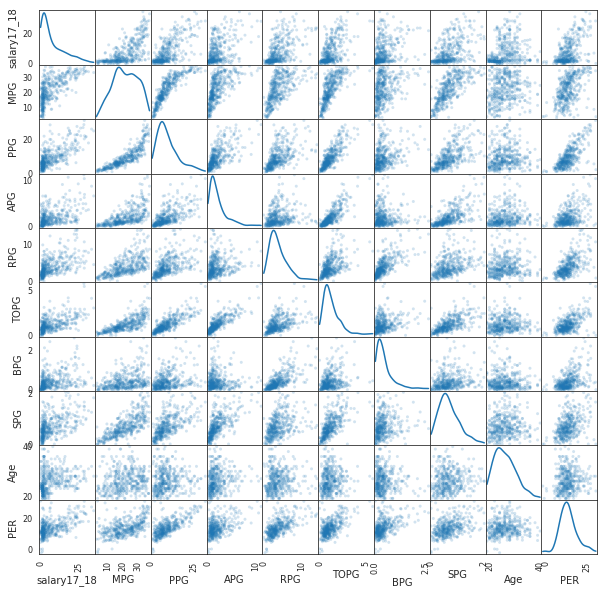

In [17]:
from pandas.plotting import scatter_matrix
#scatter_matrix(heat_salary)
scatter_matrix(heat_salary, alpha=0.2, figsize=(10,10), diagonal='kde')

In [18]:
%config InlineBackend.figure_format = 'svg'

## Dependent Variable

In [19]:
salary_table['salary17_18'].describe()

count    573.000000
mean       5.858946
std        7.162373
min        0.017224
25%        1.312611
50%        2.386864
75%        7.936509
max       34.682550
Name: salary17_18, dtype: float64

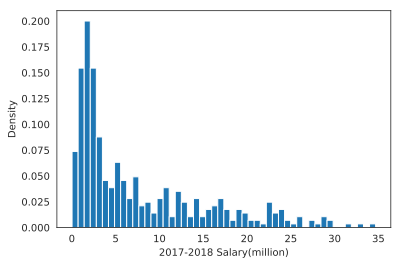

In [20]:
plt.hist(stats_salary['salary17_18'],density=True,bins=50)
plt.xlabel('2017-2018 Salary(million)')
plt.ylabel('Density')
plt.show()

In [21]:
# to convert categorical feature to dummy. make new dummies into name_value.
# it will automatic delete a value group as reference, which default to be biggest group.
def convert_dummy(df, feature,rank=0): 
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [22]:
stats_salary = convert_dummy(stats_salary,'Pos')

# Algorithms

## CART

In [23]:
#from sklearn.externals.six import StringIO
#import pydotplus
#import graphviz
#from IPython.display import Image  
#import os 

stats_salary = stats_salary.dropna()
Y = stats_salary['salary17_18']
X = stats_salary.drop(['salary17_18','Year', 'Player'],axis=1)

In [24]:
X.columns

Index(['Age', 'G', 'PER', 'MPG', 'PPG', 'APG', 'RPG', 'TOPG', 'BPG', 'SPG',
       'Pos_C', 'Pos_PF', 'Pos_PG', 'Pos_SF'],
      dtype='object')

In [25]:
# Now let us rescale our data
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
transformer = MaxAbsScaler().fit(X) # Scale each feature by its maximum absolute value.
newX = transformer.transform(X)
newX = pd.DataFrame(newX,columns = X.columns)

In [26]:
X.head()

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF
164,27.0,81.0,27.3,36.382716,29.086420,11.185185,8.135802,5.728395,0.456790,1.481481,0,0,1,0
418,28.0,81.0,30.6,34.592593,31.580247,10.370370,10.666667,5.407407,0.382716,1.641975,0,0,1,0
410,26.0,78.0,23.2,36.358974,23.141026,10.653846,4.179487,4.141026,0.628205,2.012821,0,0,1,0
204,32.0,74.0,27.0,37.756757,26.405405,8.729730,8.648649,4.094595,0.594595,1.243243,0,0,0,1
121,22.0,31.0,24.1,25.354839,20.225806,2.129032,7.838710,3.774194,2.451613,0.870968,1,0,0,0


In [27]:
newX.head() # transformed data

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF
0,0.675,0.987805,0.886364,0.963608,0.921032,1.000000,0.575787,1.000000,0.172897,0.731121,0.0,0.0,1.0,0.0
1,0.700,0.987805,0.993506,0.916196,1.000000,0.927152,0.754902,0.943966,0.144860,0.810325,0.0,0.0,1.0,0.0
2,0.650,0.951220,0.753247,0.962979,0.732769,0.952496,0.295791,0.722895,0.237779,0.993340,0.0,0.0,1.0,0.0
3,0.800,0.902439,0.876623,1.000000,0.836137,0.780473,0.612083,0.714789,0.225057,0.613549,0.0,0.0,0.0,1.0
4,0.550,0.378049,0.782468,0.671531,0.640458,0.190344,0.554762,0.658857,0.927947,0.429828,1.0,0.0,0.0,0.0


In [28]:
newX.describe()

,Age,G,PER,MPG,PPG,APG,RPG,TOPG,BPG,SPG,Pos_C,Pos_PF,Pos_PG,Pos_SF
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,0.653528,0.717435,0.445959,0.571750,0.295283,0.179149,0.273923,0.208822,0.160919,0.339014,0.209246,0.184915,0.201946,0.194647
std,0.106681,0.265725,0.165815,0.227348,0.193034,0.163312,0.174133,0.138767,0.155963,0.199901,0.407266,0.388702,0.401942,0.396411
min,0.475000,0.024390,-0.068182,0.068862,0.014073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.575000,0.560976,0.337662,0.412407,0.161856,0.073253,0.151596,0.112175,0.058231,0.203777,0.000000,0.000000,0.000000,0.000000
50%,0.650000,0.804878,0.425325,0.566786,0.246503,0.125649,0.231189,0.176897,0.118636,0.304813,0.000000,0.000000,0.000000,0.000000
75%,0.725000,0.926829,0.534091,0.763450,0.399974,0.232450,0.358661,0.276940,0.194169,0.450405,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The new transformed features has been standardize, for example, age.

In [29]:
#transformer = MinMaxScaler().fit(heat)
#newX = transformer.transform(heat)
#newX = pd.DataFrame(newX)
#scatter_matrix(newX, alpha=0.2, figsize=(10,10), diagonal='kde')
#newX.head()
#X.head()

In [30]:
#transformer = RobustScaler().fit(heat)
#newX = transformer.transform(heat)
#newX = pd.DataFrame(newX)
#scatter_matrix(newX, alpha=0.2, figsize=(10,10), diagonal='kde')
#sns.pairplot(pd.DataFrame(newX))
#newX

In [31]:
#from sklearn.preprocessing import StandardScaler
#transformer = StandardScaler().fit(heat)
#newX2 = transformer.transform(heat)
#newX2 = pd.DataFrame(newX2)
#scatter_matrix(newX2, alpha=0.2, figsize=(10,10), diagonal='kde')
#newX2

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) 
x_train_NEW, x_test_NEW, y_train_NEW, y_test_NEW = train_test_split(newX, Y, test_size = 0.3) 

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
# Define a function to evaluation regression algorithms, model is fitted algorithms 
# predict is for if display comparison of prediction and true value of test data.
def RegEvaluation(model, ytest, xtest, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(xtest)
    xtest['Pred_Y'] = model.predict(xtest)
    dt = pd.merge(totaldt,xtest,how = 'right')
    xtest.drop(['Pred_Y'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'Pred_Y']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred)
    print('RMSE is', rmse)
    print('R sequared is', r2)
    if predict:
        return dt.head(20)

+ Comparison of real and predicted values (Test data)

In [34]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(x_train, y_train)

RegEvaluation(dtree, y_test, x_test, 'Player', 'salary17_18',stats_salary)

RMSE is 6.253503047893894
R sequared is 0.3194926875757822


,Player,salary17_18,Pred_Y
0,LeBron James,33.285709,26.631215
14,Paul Millsap,31.269231,22.738944
12,Blake Griffin,29.512900,22.738944
6,Kyle Lowry,28.703704,22.738944
5,Jrue Holiday,25.686667,14.180077
22,Bradley Beal,23.775506,22.738944
23,Kevin Love,22.642350,22.738944
37,LaMarcus Aldridge,21.461010,22.738944
38,Serge Ibaka,20.061729,14.180077
26,George Hill,20.000000,8.406000


In [35]:
dtree = clf.fit(x_train_NEW, y_train_NEW)
RegEvaluation(dtree, y_test_NEW, x_test_NEW, 
              'Player', 'salary17_18',stats_salary,predict=False)

RMSE is 5.049641098520973
R sequared is 0.6650010090167843


The most important feature deciding players' salary is minutes per game. When play time longer than 31 minuates,which is standard for starting players, the expectation of salary is 18 millions dollars. When the time is less than 31.4 minuates, the average salary is just 5.18 millions dollars. For those who have more playing time, next important features are PER and Age. Players are more efficient and more aged tend to have higher salary. Using Standardized features, $RMSE$ decreases and $R^2$ imporves. Data preprocessing is really important for predicting.

In [36]:
sns.set_style("whitegrid")

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

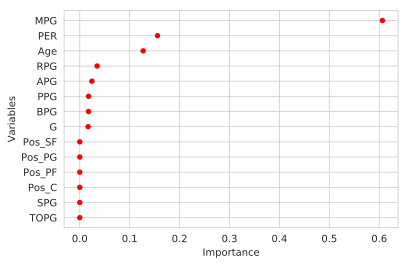

In [37]:
from tabulate import tabulate
values = sorted(zip(x_train.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

+ Unsurprisingly, the average score has the greatest impact on salary levels. The second factor is age. Average turnover and steals have no effect on salary.

## AdaBoost

> [How does AdaBoost Classifer predict?](https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/): Adaboost iteratively generates K weak classifiers. The final model is the addition of K weak classifiers. Of course, each base classifier is multiplied by its own weight. For the two-class problem (-1,1), each weak classifier will calculate a prediction result of -1 or 1. These prediction results are multiplied by the weighting coefficients of the respective weak classifiers and added. If the final result is greater than 0, it is predicted to be positive (1); otherwise, it is predicted to be negative (-1). 

+ display some of test data prediction results

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
stats_salary = stats_salary.dropna()

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=500)
adaboost = reg.fit(x_train, y_train)

RegEvaluation(adaboost, y_test, x_test, 'Player', 'salary17_18',stats_salary)

RMSE is 5.255519399334369
R sequared is 0.5193628324965172


,Player,salary17_18,Pred_Y
0,LeBron James,33.285709,24.666246
14,Paul Millsap,31.269231,22.367808
12,Blake Griffin,29.512900,24.436730
6,Kyle Lowry,28.703704,24.599495
5,Jrue Holiday,25.686667,18.063850
22,Bradley Beal,23.775506,22.510632
23,Kevin Love,22.642350,20.559599
37,LaMarcus Aldridge,21.461010,21.807447
38,Serge Ibaka,20.061729,19.362364
26,George Hill,20.000000,12.000000


In [39]:
ada = reg.fit(x_train_NEW, y_train_NEW)
RegEvaluation(ada, y_test_NEW, x_test_NEW, 
              'Player', 'salary17_18',stats_salary,predict=False)

RMSE is 4.7539002404625705
R sequared is 0.7030915190792522


Apperantly，AdaBoost has a higher prediction accuracy. Using Standardized features, $R^2$ has imporved.

+ Variable Importance

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

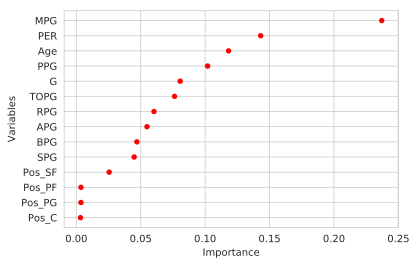

In [40]:
values = sorted(zip(x_train.columns, reg.feature_importances_), key = lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

+ The results of the AdaBoost algorithm show that the average playing time and efficiency rate have the most important impact on salary, while the average score is only ranked third. This is quite different from the decision tree results.

In [41]:
#?pd.DataFrame.sort_values